In [3]:
import re
import icecream as ic

def lire_fichier_texte(chemin_fichier):
    """
    Lit le contenu d'un fichier texte.
    
    Args:
        chemin_fichier (str): Chemin du fichier texte.
    
    Returns:
        str: Contenu du fichier texte.
    """
    try:
        with open(chemin_fichier, 'r', encoding='utf-8') as f:
            contenu = f.read()
        return contenu
    except FileNotFoundError:
        print("Le fichier spécifié est introuvable.")
    except Exception as e:
        print("Une erreur s'est produite lors de la lecture du fichier :", e)
    return None

def extraire_infos_livre(contenu):
    """
    Extrait le titre du livre et le nom de l'auteur.
    
    Args:
        contenu (str): Contenu du livre.
    
    Returns:
        tuple: Titre du livre, Nom de l'auteur.
    """
    try:
        titre = re.search(r'Title:(.*?)\n', contenu, re.DOTALL).group(1).strip()
        auteur = re.search(r'Author: (.*?)\n', contenu, re.DOTALL).group(1).strip()
        return titre, auteur
    except AttributeError:
        print("Impossible d'extraire les informations du livre : format de fichier invalide.")
    except Exception as e:
        print("Une erreur s'est produite lors de l'extraction des informations du livre :", e)
    return None, None

# Saisie du chemin du fichier depuis la ligne de commande
chemin_fichier = input("Entrez le chemin du fichier texte (.txt) : ")

# Lire le contenu du fichier texte
contenu = lire_fichier_texte(chemin_fichier)

if contenu is not None:
    # Extraire le titre du livre et le nom de l'auteur
    titre, auteur = extraire_infos_livre(contenu)
    if titre is not None and auteur is not None:
        print("Titre du livre:", titre)
        print("Auteur:", auteur)


Titre du livre: The gold hunters
Auteur: J. D. Borthwick


In [4]:
def extraire_premier_chapitre(contenu):
    """
    Extrait le premier chapitre du livre.
    
    Args:
        contenu (str): Contenu du livre.
    
    Returns:
        str: Premier chapitre du livre.
    """
    try:
        # Trouver l'index de début du premier chapitre
        debut_chapitre = contenu.find("CHAPTER I")
        if debut_chapitre == -1:
            raise ValueError("CHAPTER I non trouvé")
        
        # Trouver l'index de fin du premier chapitre
        fin_chapitre = contenu.find("CHAPTER II")
        if fin_chapitre == -1:
            raise ValueError("CHAPTER II non trouvé")
        
        # Extraire le premier chapitre du livre
        premier_chapitre = contenu[debut_chapitre:fin_chapitre]
        return premier_chapitre
    except ValueError as e:
        print("Erreur lors de l'extraction du premier chapitre :", e)
        return None

# Exécuter la fonction pour extraire le premier chapitre
premier_chapitre = extraire_premier_chapitre(contenu)
if premier_chapitre is not None:
    print("Premier chapitre du livre:")
    print(premier_chapitre)


Premier chapitre du livre:
CHAPTER I

ON TO THE GOLD FIELDS


About the beginning of the year 1851, the rage for emigration to
California from the United States was at its height. All sorts and
conditions of men, old, young, and middle-aged, allured by the hope of
acquiring sudden wealth, and fascinated with the adventure and
excitement of a life in California, were relinquishing their existing
pursuits and associations to commence a totally new existence in the
land of gold.

The rush of eager gold-hunters was so great that the Panama Steamship
Company’s office in New York used to be perfectly mobbed for a day and a
night previous to the day appointed for selling tickets for their
steamers. Sailing vessels were despatched for Chagres almost daily,
carrying crowds of passengers, while numbers went by the different
routes through Mexico, and others chose the easier, but more tedious,
passage round Cape Horn.

The emigration from the Western States was naturally very large, the
inhabitan

In [5]:
def extraire_infos_introduction(contenu):
    """
    Extrait les informations de l'introduction du livre.
    
    Args:
        contenu (str): Contenu de l'introduction.
    
    Returns:
        dict: Dictionnaire contenant les informations extraites.
    """
    infos = {}
    
    try:
        # Extraire le titre du livre
        titre_match = re.search(r'Title: (.*?)\n', contenu)
        if titre_match:
            infos['Titre'] = titre_match.group(1).strip()
        
        # Extraire l'auteur du livre
        auteur_match = re.search(r'Author: (.*?)\n', contenu)
        if auteur_match:
            infos['Auteur'] = auteur_match.group(1).strip()
        
        # Extraire la date de publication du livre
        date_publication_match = re.search(r'Release date: (.*?)\n', contenu)
        if date_publication_match:
            infos['Date de publication'] = date_publication_match.group(1).strip()
        
        # Extraire la langue du livre
        langue_match = re.search(r'Language: (.*?)\n', contenu)
        if langue_match:
            infos['Langue'] = langue_match.group(1).strip()
        
        # Extraire la publication originale du livre
        publication_originale_match = re.search(r'Original publication: (.*?)\n', contenu)
        if publication_originale_match:
            infos['Publication originale'] = publication_originale_match.group(1).strip()
    except Exception as e:
        print("Une erreur s'est produite lors de l'extraction des informations de l'introduction :", e)
        return None
    
    return infos

# Exécuter la fonction pour extraire les informations de l'introduction
infos_introduction = extraire_infos_introduction(contenu)
if infos_introduction is not None:
    print("Informations extraites de l'introduction du livre:")
    print(infos_introduction)


Informations extraites de l'introduction du livre:
{'Titre': 'The gold hunters', 'Auteur': 'J. D. Borthwick', 'Date de publication': 'February 10, 2024 [eBook #72919]', 'Langue': 'English', 'Publication originale': 'NYC: Outing Publishing Company, 1917'}


In [6]:
def extraire_resume(contenu):
    """
    Extrait le résumé du livre à partir de l'introduction.
    
    Args:
        contenu (str): Contenu de l'introduction.
    
    Returns:
        str: Résumé du livre.
    """
    try:
        resume = ""
        
        # Trouver le début du résumé
        debut_resume = contenu.find("INTRODUCTION")
        if debut_resume != -1:
            # Extraire le résumé
            debut_resume = contenu.find("\n\n", debut_resume) + 2
            fin_resume = contenu.find("\n\n", debut_resume)
            resume = contenu[debut_resume:fin_resume].strip()
        
        return resume
    except Exception as e:
        print("Une erreur s'est produite lors de l'extraction du résumé du livre :", e)
        return None

# Exécuter la fonction pour extraire le résumé du livre
resume_livre = extraire_resume(contenu)
if resume_livre is not None:
    print("le contexte de l'histoire")
    print(resume_livre)


le contexte de l'histoire
California under Spanish and Mexican rule was a lotus-land of lazy,
good-natured, hospitable friars, of tame and submissive Indian
neophytes, of vast savannas swarming with half-wild herds, of orchards
and gardens, vineyards and olive groves. There was no mining, no
lumbering, no machinery, no commerce other than a contraband exchange of
hides and tallow for clothing, merchandise and manufactures. There was
no art, no science, no literature, no news, save at rare intervals, from
the outer world. One day was like another from generation to generation.
Everyone was content with his mode of life or ignorant of any other. War
never harassed the Franciscans’ drowsy realm, nor ever threatened,
beyond a few opéra bouffe affairs that began and ended in loud talk and
bloodless gesticulation.


In [7]:
def count_words(content):
    """
    Counts the number of words in the content.

    Args:
        content (str): The content of the ebook.

    Returns:
        int: Number of words.
    """
    try:
        word_count = len(content.split())
        return word_count
    except Exception as e:
        print("Error occurred while counting words:", str(e))
        return -1

# Example usage:
word_count = count_words(contenu)
print("Word Count:", word_count)


Word Count: 101678


In [8]:
def calculate_word_frequency(content):
    """
    Calculates the frequency of each word in the content.

    Args:
        content (str): The content of the ebook.

    Returns:
        dict: Dictionary with word frequencies.
    """
    try:
        words = re.findall(r'\b\w+\b', content.lower())
        word_freq = Counter(words)
        return word_freq
    except Exception as e:
        print("Error occurred while calculating word frequency:", str(e))
        return {}

# Example usage:
word_frequency = calculate_word_frequency(contenu)
print("Word Frequency:", word_frequency)


Error occurred while calculating word frequency: name 'Counter' is not defined
Word Frequency: {}


In [9]:
def extract_information_chapters(contents):
    """
    Extracts information about the chapters of the book from the table of contents.
    
    Args:
        contents (str): Table of contents.
    
    Returns:
        tuple: Number of chapters, list of chapter titles, total number of pages.
    """
    try:
        # Find all chapter titles and their corresponding page numbers
        chapter_info = re.findall(r'\n([IVXLCDM]+)\.\s+(.*?)\s+(\d+)', contents)
        
        # Extract chapter titles and page numbers
        chapter_titles = [info[1] for info in chapter_info]
        page_numbers = [int(info[2]) for info in chapter_info]
        
        # Calculate total number of pages
        total_pages = max(page_numbers)
        
        # Calculate number of chapters
        num_chapters = len(chapter_titles)
        
        return num_chapters, chapter_titles, total_pages
    except Exception as e:
        print("Une erreur s'est produite lors de l'extraction des informations sur les chapitres :", e)
        return None, None, None

def calculate_pages_per_chapter(page_numbers):
    """
    Calculates the number of pages per chapter.
    
    Args:
        page_numbers (list): List of page numbers.
    
    Returns:
        list: Number of pages per chapter.
    """
    try:
        # Sort the page numbers in ascending order
        page_numbers.sort()
        
        # Calculate the number of pages per chapter
        pages_per_chapter = [page_numbers[i+1] - page_numbers[i] for i in range(len(page_numbers)-1)]
        pages_per_chapter.append(0)  # Add a placeholder for the last chapter
        return pages_per_chapter
    except Exception as e:
        print("Une erreur s'est produite lors du calcul des pages par chapitre :", e)
        return None


# Extract information about the chapters
num_chapters, chapter_titles, total_pages = extract_information_chapters(contenu)

if num_chapters is not None and chapter_titles is not None and total_pages is not None:
    # Calculate the number of pages per chapter
    pages_per_chapter = calculate_pages_per_chapter(sorted([int(page) for page in re.findall(r'\d+', contenu)]))
    
    if pages_per_chapter is not None:
        # Display the results
        print("Number of chapters:", num_chapters)
        print("Chapter titles:", chapter_titles)
        print("Total number of pages:", total_pages)


Number of chapters: 27
Chapter titles: ['ON TO THE GOLD FIELDS', 'ACROSS THE ISTHMUS', 'A CITY IN THE MAKING', 'LIFE AT HIGH SPEED', 'OFF FOR THE MINES', 'LOOKING FOR GOLD', 'INDIANS AND CHINAMEN', 'MINERS’ LAW', 'GOLD IS WHERE YOU FIND IT', 'URSUS HORRIBILIS', 'ON THE TRAIL', 'SITTERS FOR PORTRAITS', 'ON THE WAY TO DOWNIEVILLE', 'THE REASON FOR LYNCH LAW', 'GROWING OVER NIGHT', 'A BAND OF WANDERERS', 'CHINESE IN THE EARLY DAYS', 'DOWN WITH THE FLOOD', 'A BULL AND BEAR FIGHT', 'A MOUNTAIN OF GOLD', 'IN LIGHTER MOOD', 'SONORA AND THE MEXICANS', 'BULL FIGHTING', 'A CITY BURNED', 'THE DAY WE CELEBRATE', 'FRENCHMEN IN THE MINES', 'THE RESOURCEFUL AMERICANS']
Total number of pages: 353


In [10]:
def analyze_paragraphs(content):
    """
    Analyzes the paragraphs in terms of their length.

    Args:
        content (str): The content of the ebook.

    Returns:
        dict: Dictionary with paragraph lengths.
    """
    try:
        paragraphs = content.split('\n\n')
        paragraph_lengths = [len(paragraph.split()) for paragraph in paragraphs]
        paragraph_stats = {
            "max_length": max(paragraph_lengths),
            "min_length": min(paragraph_lengths),
            "average_length": sum(paragraph_lengths) / len(paragraph_lengths)
        }
        return paragraph_stats
    except Exception as e:
        print("Error occurred while analyzing paragraphs:", str(e))
        return {}

# Example usage:
paragraph_stats = analyze_paragraphs(contenu)
print("Paragraph Statistics:", paragraph_stats)


Paragraph Statistics: {'max_length': 549, 'min_length': 0, 'average_length': 93.62615101289134}


In [11]:
def analyze_sentences(content):
    """
    Analyzes the sentences in terms of their length.

    Args:
        content (str): The content of the ebook.

    Returns:
        dict: Dictionary with sentence lengths.
    """
    try:
        sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', content)
        sentence_lengths = [len(sentence.split()) for sentence in sentences]
        sentence_stats = {
            "max_length": max(sentence_lengths),
            "min_length": min(sentence_lengths),
            "average_length": sum(sentence_lengths) / len(sentence_lengths)
        }
        return sentence_stats
    except Exception as e:
        print("Error occurred while analyzing sentences:", str(e))
        return {}

# Example usage:
sentence_stats = analyze_sentences(contenu)
print("Sentence Statistics:", sentence_stats)


Sentence Statistics: {'max_length': 192, 'min_length': 0, 'average_length': 35.814723494188094}


In [12]:
def unique_words(content):
    """
    Finds the unique words in the ebook.

    Args:
        content (str): The content of the ebook.

    Returns:
        int: Number of unique words.
    """
    try:
        words = re.findall(r'\b\w+\b', content.lower())
        unique_words = set(words)
        return len(unique_words)
    except Exception as e:
        print("Error occurred while finding unique words:", str(e))
        return 0

# Example usage:
unique_count = unique_words(contenu)
print("Number of Unique Words:", unique_count)


Number of Unique Words: 8973


In [13]:
def unique_word_ratio(content):
    """
    Calculates the ratio of unique words to total words in the ebook.

    Args:
        content (str): The content of the ebook.

    Returns:
        float: The ratio of unique words to total words.
    """
    try:
        words = re.findall(r'\b\w+\b', content.lower())
        total_words = len(words)
        print(total_words)
        unique_words = set(words)
        print(len(unique_words))
        unique_word_count = len(unique_words)
        if total_words > 0:
            return unique_word_count / total_words
        else:
            return 0
    except Exception as e:
        print("Error occurred while calculating unique word ratio:", str(e))
        return 0

# Example usage:
ratio = unique_word_ratio(contenu)
print("Ratio of Unique Words to Total Words:", ratio)


103249
8973
Ratio of Unique Words to Total Words: 0.08690641071584228


In [14]:
def longest_chapter(chapters):
    """
    Finds the longest chapter among the given list of chapters.
    
    Args:
        chapters (list): List of chapters.
    
    Returns:
        str: The longest chapter containing only the Roman numeral and the sentence following it.
    """
    try:
        longest_length = 0
        longest_chapter_info = ""
        for chapter in chapters:
            matches = re.findall(r'(I|II|III|IV|V|VI|VII|VIII|IX|X|XI|XII|XIII|XIV|XV|XVI|XVII|XVIII|XIX|XX)\b.*?\n\n(.*?)\n\n', chapter, re.DOTALL)
            for match in matches:
                length = len(match[1].split())
                if length > longest_length:
                    longest_length = length
                    longest_chapter_info = f"{match[0]}\n\n{match[1]}"
        return longest_chapter_info.strip()
    except Exception as e:
        print("Une erreur s'est produite lors de la recherche du chapitre le plus long :", e)
        return None

def split_chapters(text):
    return re.split(r'CHAPTER', text)

# Split the text into chapters
chapters = split_chapters(contenu)

if chapters is not None:
    # Find the longest chapter containing "CHAPTER IV"
    longest = longest_chapter(chapters)
    if longest is not None:
        long = longest[0]
        print("The longest chapter is:")
        print(long)


The longest chapter is:
I


In [15]:
from collections import Counter

def most_common_words(chapters):
    """
    Finds the most common content words (excluding articles, prepositions, and verbs "avoir" and "être") in each chapter.
    
    Args:
        chapters (list): List of chapters.
    
    Returns:
        dict: Dictionary where keys are chapter numbers and values are lists of most common words.
    """
    try:
        # Define a set of articles, prepositions, verbs, and other common words
        excluded_words = {'I', 'any','man','which','who','whom','i','him','much','about','two', 'You','you', 'we','We','They','they','a', 'an', 'the', 'of', 'in', 'by', 'to', 'from', 'at', 'on', 'for', 'with', 'upon', 'within', 'under', 'above', 'below', 'between', 'among', 'over', 'through', 'across', 'before', 'after', 'behind', 'beside', 'besides', 'against', 'during', 'throughout', 'amid', 'against', 'avoir', 'être', 'is', 'are', 'was', 'were', 'be', 'being', 'been', 'do', 'does', 'did', 'has', 'have', 'had', 'shall', 'will', 'should', 'would', 'can', 'could', 'may', 'might', 'must', 'and', 'that', 'as', 'it', 'he', 'she', 'they', 'them', 'I', 'my', 'we', 'you', 'his', 'her', 'its', 'our', 'their', 'this', 'these', 'those', 'which', 'what', 'when', 'where', 'why', 'how', 'no', 'not', 'so', 'or', 'but', 'all', 'very', 'one', 'up', 'out', 'down', 'over', 'under', 'here', 'there', 'now', 'then', 'will', 'just', 'like', 'more', 'most', 'even', 'only', 'than', 'too', 'also', 'again', 'other', 'some', 'such', 'well', 'an', 'the', 'of', 'in', 'by', 'to', 'from', 'at', 'on', 'for', 'with', 'upon', 'within', 'under', 'above', 'below', 'between', 'among', 'over', 'through', 'across', 'before', 'after', 'behind', 'beside', 'besides', 'against', 'during', 'throughout', 'amid', 'against', 'avoir', 'être', 'is', 'are', 'was', 'were', 'be', 'being', 'been', 'do', 'does', 'did', 'has', 'have', 'had', 'shall', 'will', 'should', 'would', 'can', 'could', 'may', 'might', 'must', 'and', 'that', 'as', 'it', 'he', 'she', 'they', 'them'}
        
        common_words_per_chapter = {}
        for i, chapter in enumerate(chapters):
            words = re.findall(r'\b\w+\b', chapter)  # Extract words
            # Filter out excluded words
            words = [word for word in words if word.lower() not in excluded_words]
            word_counts = Counter(words)
            common_words = word_counts.most_common(5)  # Get 5 most common words
            common_words_per_chapter[f"Chapter {i+1}"] = common_words
        return common_words_per_chapter
    except Exception as e:
        print("Une erreur s'est produite lors de la recherche des mots les plus courants dans chaque chapitre :", e)
        return {}

# Find the most common words in each chapter
common_words = most_common_words(chapters)

# Display the most common words in each chapter
for chapter, words in common_words.items():
    print(f"Most common words in {chapter}:")
    for word, count in words:
        print(f"{word}: {count}")
    print()


Most common words in Chapter 1:
men: 15
California: 13
gold: 10
many: 8
States: 6

Most common words in Chapter 2:
GOLD: 4
CITY: 2
MINES: 2
LAW: 2
BULL: 2

Most common words in Chapter 3:
us: 26
river: 26
men: 23
night: 16
passengers: 16

Most common words in Chapter 4:
time: 15
Americans: 12
passengers: 12
great: 11
board: 11

Most common words in Chapter 5:
men: 19
houses: 14
old: 14
California: 13
city: 13

Most common words in Chapter 6:
men: 31
San: 20
every: 17
Francisco: 16
fire: 16

Most common words in Chapter 7:
California: 18
San: 16
Francisco: 14
Sacramento: 14
miles: 14

Most common words in Chapter 8:
dirt: 33
miners: 16
gold: 15
water: 15
long: 14

Most common words in Chapter 9:
Indians: 18
men: 18
made: 13
day: 13
great: 12

Most common words in Chapter 10:
men: 21
mines: 16
into: 13
made: 11
rats: 11

Most common words in Chapter 11:
mines: 13
miners: 12
work: 10
table: 10
long: 9

Most common words in Chapter 12:
bear: 14
s: 10
hunter: 10
into: 9
three: 9

Most commo

In [16]:
import re

def count_words_per_chapter(chapters):
    """
    Counts the number of words in each chapter.
    
    Args:
        chapters (list): List of chapters.
    
    Returns:
        dict: Dictionary where keys are chapter titles and values are the number of words in each chapter.
    """
    words_per_chapter = {}
    for i, chapter in enumerate(chapters):
        # Utiliser une expression régulière pour extraire le titre du chapitre et le contenu entre les délimiteurs CHAPTER
        match = re.findall(r'(CHAPTER [IVXLCDM]+).*?\n\n(.*?)\n\n', chapter, re.DOTALL)
        if match:
            chapter_title = match[0][0]  # Accéder au premier groupe correspondant au titre du chapitre
            words = re.findall(r'\b\w+\b', match[0][1])  # Extraire les mots dans le contenu du chapitre
            word_count = len(words)
            words_per_chapter[chapter_title] = word_count
    return words_per_chapter

# Compter le nombre de mots dans chaque chapitre
words_count_per_chapter = count_words_per_chapter(chapters)

# Afficher le nombre de mots dans chaque chapitre
for chapter, word_count in words_count_per_chapter.items():
    print(f"Number of words in {chapter}: {word_count}")


Nombre de mots dans chaque paragraphe du premier chapitre:
0 mots: 4 paragraphes
20 mots: 1 paragraphes
30 mots: 1 paragraphes
40 mots: 9 paragraphes
50 mots: 6 paragraphes
60 mots: 8 paragraphes
70 mots: 11 paragraphes
80 mots: 8 paragraphes
90 mots: 1 paragraphes
110 mots: 3 paragraphes
120 mots: 5 paragraphes
130 mots: 1 paragraphes
140 mots: 3 paragraphes
150 mots: 2 paragraphes
160 mots: 1 paragraphes
170 mots: 2 paragraphes
180 mots: 2 paragraphes
190 mots: 1 paragraphes
220 mots: 1 paragraphes
300 mots: 2 paragraphes


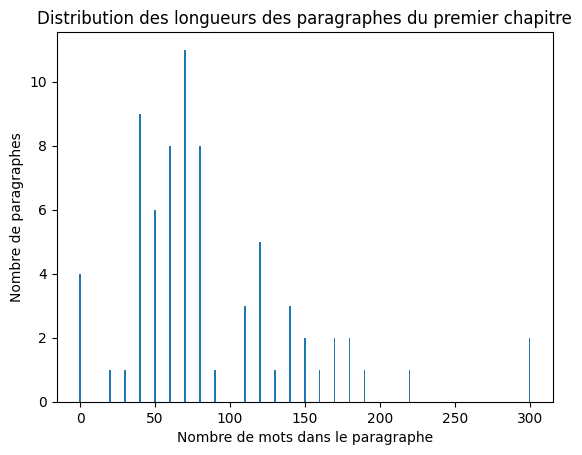

In [17]:
import re
import matplotlib.pyplot as plt

def compter_mots(paragraphe):
    """
    Compte le nombre de mots dans un paragraphe.
    
    Args:
        paragraphe (str): Paragraphe du livre.
    
    Returns:
        int: Nombre de mots dans le paragraphe.
    """
    mots = re.findall(r'\w+', paragraphe)
    return len(mots)

def arrondir_dizaine(nombre):
    """
    Arrondit un nombre à la dizaine la plus proche.
    
    Args:
        nombre (int): Nombre à arrondir.
    
    Returns:
        int: Nombre arrondi à la dizaine la plus proche.
    """
    return round(nombre, -1)

def creer_graphique_distribution(distribution):
    """
    Crée un graphique montrant la distribution des longueurs des paragraphes.
    
    Args:
        distribution (dict): Distribution des longueurs des paragraphes.
    """
    longueurs = list(distribution.keys())
    frequences = list(distribution.values())
    
    plt.bar(longueurs, frequences, align='center')
    plt.xlabel('Nombre de mots dans le paragraphe')
    plt.ylabel('Nombre de paragraphes')
    plt.title('Distribution des longueurs des paragraphes du premier chapitre')
    plt.show()

# Diviser le premier chapitre en paragraphes
paragraphes = premier_chapitre.split('\n\n')

# Compter le nombre de mots dans chaque paragraphe et arrondir à la dizaine
nb_mots_paragraphe = [arrondir_dizaine(compter_mots(paragraphe)) for paragraphe in paragraphes]

# Trier les nombres de mots arrondis
nb_mots_paragraphe.sort()

# Compter le nombre de paragraphes contenant le même nombre de mots
distribution = {}
for nb in nb_mots_paragraphe:
    distribution[nb] = distribution.get(nb, 0) + 1

# Afficher le nombre de mots dans chaque paragraphe
print("Nombre de mots dans chaque paragraphe du premier chapitre:")
for longueur, freq in distribution.items():
    print(f"{longueur} mots: {freq} paragraphes")

# Créer un graphique de distribution des longueurs des paragraphes
creer_graphique_distribution(distribution)


In [18]:
import requests
from bs4 import BeautifulSoup
import re


from urllib.parse import quote

def chercher_images_google(titre, auteur):
    """
    Recherche des images correspondant au titre du livre et au nom de l'auteur sur Google Images.
    
    Args:
        titre (str): Titre du livre.
        auteur (str): Nom de l'auteur.
    
    Returns:
        list: Liste des URL des images trouvées, ou une liste vide si aucune image n'a été trouvée.
    """
    try:
        # Construire l'URL de recherche sur Google Images en encodant les espaces et autres caractères spéciaux
        recherche_encodee = quote(f"{titre}+{auteur}+draw")
        url_recherche = f"https://www.google.com/search?q={recherche_encodee}&tbm=isch&ved"
        print(url_recherche)
        
        # Effectuer une requête HTTP pour récupérer le contenu de la page de recherche
        reponse = requests.get(url_recherche)
        
        # Vérifier si la requête a réussi
        if reponse.status_code == 200:
            # Créer un objet BeautifulSoup pour analyser le contenu HTML de la page
            soup = BeautifulSoup(reponse.content, 'html.parser')
            # Trouver toutes les balises <img> contenant les résultats de recherche d'images
            balises_images = soup.find_all('img')
            if balises_images:
                # Extraire les URL de toutes les images
                urls_images = [img['src'] for img in balises_images]
                return urls_images
            else:
                print("Aucune image trouvée sur Google Images.")
                return []
        else:
            print("Échec de la recherche sur Google Images. Code de statut:", reponse.status_code)
            return []
    except Exception as e:
        print("Une erreur s'est produite lors de la recherche sur Google Images:", str(e))
        return []

# Lire le contenu du fichier texte
contenu = lire_fichier_texte(chemin_fichier)

# Extraire le titre du livre et le nom de l'auteur
titre, auteur = extraire_infos_livre(contenu)

# Rechercher des images correspondant au titre du livre et au nom de l'auteur sur Google Images
if titre and auteur:
    urls_images = chercher_images_google(titre, auteur)
    if urls_images:
        print("URLs des images trouvées:", urls_images)
    else:
        print("Aucune image correspondante trouvée sur Internet.")
else:
    print("Impossible de récupérer le titre du livre et le nom de l'auteur à partir du contenu.")
print(titre)


https://www.google.com/search?q=The%20gold%20hunters%2BJ.%20D.%20Borthwick%2Bdraw&tbm=isch&ved
URLs des images trouvées: ['/images/branding/searchlogo/1x/googlelogo_desk_heirloom_color_150x55dp.gif', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSG7rQzVF9jBnJzKtgNzZft_wWGiTVv5yauqyFh41gxhfSxwdPmLfHGSBi3Mg&s', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTmbOMdep2ckyAboDE1bsfNAFARPDnw-Ao5aO-zpkMxdOSA5sHOzop-OLhi2g&s', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSvx7B_CR5KvoaTRUUPqVtiw5QtsZnfQwpcA8rwvVKFz_ZAXTjtyXuyME7g7Q&s', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSu0DXMirvT16GrrQ9_yG0YldLI4aIcKbYnZLwjQYGorK8GLfTSTkwRW7hVNg&s', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQRFDFmMdrhZSY0V8e_0dn6RAFPO3fa3IqoR63e1BIGl1Zx0U0czKA-GsKFyg&s', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRVSnOA0y0xkVs7fw8obqtgHPjZ70uCX4DYjaYRyby8S2aF5tZZCi76iJf1LCk&s', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQji9kNd64hfMk31gN5tp_1qg

In [19]:
import requests

def telecharger_image(url_image, nom_fichier):
    """
    Télécharge une image à partir de son URL et l'enregistre localement.
    
    Args:
        url_image (str): URL de l'image à télécharger.
        nom_fichier (str): Nom du fichier de destination.
    
    Returns:
        bool: True si le téléchargement réussit, False sinon.
    """
    try:
        # Effectuer une requête HTTP pour récupérer le contenu de l'image
        reponse = requests.get(url_image)
        
        # Vérifier si le téléchargement a réussi
        if reponse.status_code == 200:
            # Enregistrer l'image dans un fichier local avec le nom spécifié
            with open(nom_fichier, 'wb') as f:
                f.write(reponse.content)
            print("Téléchargement réussi.")
            return True
        else:
            print("Échec du téléchargement. Code de statut:", reponse.status_code)
            return False
    except Exception as e:
        print("Une erreur s'est produite lors du téléchargement de l'image:", str(e))
        return False
    

    # Vérifier s'il y a au moins deux images dans la liste
if len(urls_images) >= 2:
    # Télécharger la deuxième image
    url_image_deuxieme = urls_images[1]  # L'index commence à 0
    nom_fichier = f"{titre}.jpg"  # Nom du fichier de destination
    telecharger_image(url_image_deuxieme, nom_fichier)
else:
    print("Il n'y a pas suffisamment d'images dans la liste pour télécharger la deuxième.")

Téléchargement réussi.


In [20]:
try:
    from PIL import Image
except ImportError as e:
    print("Erreur d'importation de PIL :", e)
    exit()

# Ouvrir l'image à agrandir
image_path = f"{titre}.jpg"  # Remplacez "{titre}.jpg" par le chemin de votre image
try:
    image = Image.open(image_path)
except IOError as e:
    print("Erreur lors de l'ouverture de l'image :", e)
    exit()

# Définir la nouvelle taille de l'image (en pourcentage d'agrandissement)
facteur_agrandissement = 1.5  # Par exemple, 1.5 pour agrandir l'image de 50%
largeur_originale, hauteur_originale = image.size
nouvelle_largeur = int(largeur_originale * facteur_agrandissement)
nouvelle_hauteur = int(hauteur_originale * facteur_agrandissement)

# Redimensionner l'image en fonction de la nouvelle taille
image_agrandie = image.resize((nouvelle_largeur, nouvelle_hauteur))

# Ajouter une légère rotation (par exemple, 5 degrés)
angle_rotation = 5
image_agrandie = image_agrandie.rotate(angle_rotation, resample=Image.BICUBIC, expand=True)

# Enregistrer l'image agrandie
nom_fichier_destination = f"{titre}_agrandie.jpg"  # Remplacez "{titre}_agrandie.jpg" par le nom de votre fichier de destination
try:
    image_agrandie.save(nom_fichier_destination)
except Exception as e:
    print("Erreur lors de l'enregistrement de l'image agrandie :", e)
    exit()


In [21]:
try:
    from PIL import Image
except ImportError as e:
    print("Erreur d'importation de PIL :", e)
    exit()

# Charger l'image #1
image_path_1 = f"{titre}_agrandie.jpg"  # Remplacez "{titre}_agrandie.jpg" par le chemin de votre image #1
try:
    image_1 = Image.open(image_path_1)
except IOError as e:
    print("Erreur lors du chargement de l'image #1 :", e)
    exit()

# Charger l'image #2 (logo) et convertir en noir et blanc si nécessaire
image_path_2 = "logo.jpg"  # Remplacez "logo.jpg" par le chemin de votre image #2 (logo)
try:
    image_2 = Image.open(image_path_2).convert("L")
except IOError as e:
    print("Erreur lors du chargement de l'image #2 (logo) :", e)
    exit()

# Réduire la taille de l'image #2 par un facteur de 8
largeur_reduite = image_2.width // 8
hauteur_reduite = image_2.height // 8
image_reduite = image_2.resize((largeur_reduite, hauteur_reduite))

# Appliquer une rotation à l'image #2
angle_rotation = 5  # Angle de rotation en degrés
image_rotated = image_reduite.rotate(angle_rotation, expand=True)

# Calculer les coordonnées de collage pour placer le logo en bas à droite2
position_x = image_1.width - image_rotated.width
position_y = image_1.height - image_rotated.height
position = (position_x, position_y)

# Coller l'image #2 (logo) sur l'image #1 en bas à droite
image_1.paste(image_rotated, position, image_rotated)

# Enregistrer l'image résultante
nom_fichier_destination = f"{titre}_resultat.jpg"   # Remplacez "resultat.jpg" par le nom de votre fichier de destination
try:
    image_1.save(nom_fichier_destination)
except Exception as e:
    print("Erreur lors de l'enregistrement de l'image résultante :", e)
    exit()


In [23]:
try:
    from docx import Document
    from docx.shared import Pt
    from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
except ImportError as e:
    print("Erreur d'importation de docx :", e)
    exit()

# Création d'un nouveau document Word
try:
    doc = Document()
except Exception as e:
    print("Erreur lors de la création du document Word :", e)
    exit()

# Ajout de la page de titre
doc.add_heading(f"Titre du Livre : {titre}", level=1).bold = True
doc.add_picture(f"{titre}_resultat.jpg") # Remplacez "photo_n1.jpg" par le nom de votre photo
doc.add_heading(f"Auteur du Livre : {auteur}", level=2).italic = True
doc.add_paragraph("Auteur du rapport : Yann", style='Heading 2')

# Ajout de la page de graphique
doc.add_page_break()
doc.add_heading("Graphique de la Distribution des Longueurs des Paragraphes", level=1).bold = True
doc.add_paragraph("Description de l'Image :")
doc.add_paragraph("Explication de l'Intrigue, y Compris Certaines Données :")
doc.add_paragraph("(Par exemple, nombre de paragraphes, nombre de mots dans le premier chapitre, nombre minimal et maximal de mots dans un paragraphe, nombre moyen de mots dans un paragraphe, source des données, etc.)")

# Enregistrement du document
nom_fichier_destination = "document_word.docx"
try:
    doc.save(nom_fichier_destination)
except Exception as e:
    print("Erreur lors de l'enregistrement du document Word :", e)
    exit()
